In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [144]:
df = pd.read_csv("/home/sscf/vol_products_ftx/user_data/Binance_BTCUSDT_d.csv")
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.665446e+12,2022-10-11 00:00:00,BTC/USDT,19131.87,19133.52,18950.01,19032.94,9337.97001,1.777093e+08,158282.0
1,1.665360e+12,2022-10-10 00:00:00,BTC/USDT,19439.96,19525.00,19020.25,19131.87,212509.09849,4.101745e+09,4432688.0
2,1.665274e+12,2022-10-09 00:00:00,BTC/USDT,19416.52,19558.00,19316.04,19439.02,113900.82681,2.215007e+09,2833704.0
3,1.665187e+12,2022-10-08 00:00:00,BTC/USDT,19530.09,19627.38,19237.14,19417.96,102480.09842,1.995917e+09,2637385.0
4,1.665101e+12,2022-10-07 00:00:00,BTC/USDT,19960.67,20068.82,19320.00,19530.09,220874.83913,4.353681e+09,4324772.0
...,...,...,...,...,...,...,...,...,...,...
1878,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1879,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1880,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1881,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [145]:
df = df.drop(columns = ["unix", "symbol", "Volume BTC", "tradecount", "high", "low"])
df

,date,open,close,Volume USDT
0,2022-10-11 00:00:00,19131.87,19032.94,1.777093e+08
1,2022-10-10 00:00:00,19439.96,19131.87,4.101745e+09
2,2022-10-09 00:00:00,19416.52,19439.02,2.215007e+09
3,2022-10-08 00:00:00,19530.09,19417.96,1.995917e+09
4,2022-10-07 00:00:00,19960.67,19530.09,4.353681e+09
...,...,...,...,...
1878,2017-08-21,4086.29,4016.00,2.770592e+06
1879,2017-08-20,4139.98,4086.29,1.915636e+06
1880,2017-08-19,4108.37,4139.98,1.508239e+06
1881,2017-08-18,4285.08,4108.37,4.994494e+06


In [146]:
df["MOVE"] = np.absolute(df["close"] - df["open"])  # Calculate abs value of close - open
df

,date,open,close,Volume USDT,MOVE
0,2022-10-11 00:00:00,19131.87,19032.94,1.777093e+08,98.93
1,2022-10-10 00:00:00,19439.96,19131.87,4.101745e+09,308.09
2,2022-10-09 00:00:00,19416.52,19439.02,2.215007e+09,22.50
3,2022-10-08 00:00:00,19530.09,19417.96,1.995917e+09,112.13
4,2022-10-07 00:00:00,19960.67,19530.09,4.353681e+09,430.58
...,...,...,...,...,...
1878,2017-08-21,4086.29,4016.00,2.770592e+06,70.29
1879,2017-08-20,4139.98,4086.29,1.915636e+06,53.69
1880,2017-08-19,4108.37,4139.98,1.508239e+06,31.61
1881,2017-08-18,4285.08,4108.37,4.994494e+06,176.71


In [147]:
df["date"][0:1759] = df["date"][0:1759].str[:10]
df

/tmp/ipykernel_4685/3915627097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][0:1759] = df["date"][0:1759].str[:10]


,date,open,close,Volume USDT,MOVE
0,2022-10-11,19131.87,19032.94,1.777093e+08,98.93
1,2022-10-10,19439.96,19131.87,4.101745e+09,308.09
2,2022-10-09,19416.52,19439.02,2.215007e+09,22.50
3,2022-10-08,19530.09,19417.96,1.995917e+09,112.13
4,2022-10-07,19960.67,19530.09,4.353681e+09,430.58
...,...,...,...,...,...
1878,2017-08-21,4086.29,4016.00,2.770592e+06,70.29
1879,2017-08-20,4139.98,4086.29,1.915636e+06,53.69
1880,2017-08-19,4108.37,4139.98,1.508239e+06,31.61
1881,2017-08-18,4285.08,4108.37,4.994494e+06,176.71


Text(0, 0.5, 'Probability')

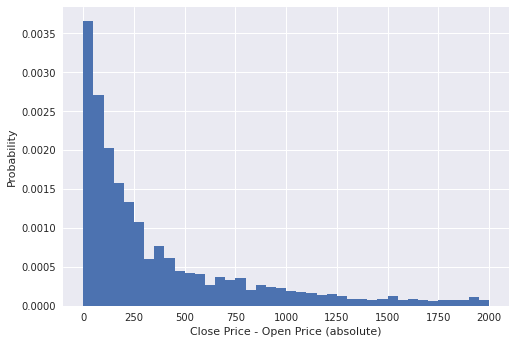

In [148]:
mpl.style.use("seaborn")
plt.hist(df["MOVE"], bins = 40, range = (0, 2000), density = True)
plt.xlabel("Close Price - Open Price (absolute)")
plt.ylabel("Probability")

In [149]:
# Economic news release dates since 01.01.2021

man_pmi = ["2022-10-03", "2022-09-01", "2022-08-01", "2022-07-01", "2022-06-01", "2022-05-02", "2022-04-01", "2022-03-01", "2022-02-01", "2022-01-04", "2021-12-01", "2021-11-01",
           "2021-10-01", "2021-09-01", "2021-08-02", "2021-07-01", "2021-06-01", "2021-05-03", "2021-04-01", "2021-03-01", "2021-02-01", "2021-01-05"]
employment = ["2022-10-07", "2022-09-02", "2022-08-05", "2022-08-05", "2022-07-08", "2022-06-03", "2022-05-06", "2022-04-01", "2022-03-04", "2022-02-04", "2022-01-07",
              "2021-12-03" , "2021-11-05" , "2021-10-08" , "2021-09-03" , "2021-08-06" , "2021-07-02" , "2021-06-04" , "2021-05-07" , "2021-04-02" , "2021-03-05" , "2021-02-05",
               "2021-01-08"]
gdp = ["2022-07-28", "2022-04-28", "2022-01-27", "2021-10-28", "2021-07-29", "2021-04-29", "2021-01-28"]
cpi = ["2022-09-13", "2022-08-10", "2022-07-13", "2022-06-10", "2022-05-11", "2022-04-12", "2022-03-10", "2022-02-10", "2022-01-12", "2021-12-10", "2021-11-10", "2021-10-13",
       "2021-09-14", "2021-08-11", "2021-07-13", "2021-06-10", "2021-05-12", "2021-04-13", "2021-03-10", "2021-02-10", "2021-01-13"]
pce = ["2022-09-30", "2022-08-26", "2022-07-29",
       "2022-06-30", "2022-05-27", "2022-04-29", "2022-03-31", "2022-02-25", "2022-01-28", "2021-12-23", "2021-11-24", "2021-10-29", "2021-10-01", "2021-08-27", "2021-07-30",
       "2021-06-25", "2021-05-28", "2021-04-30", "2021-03-26", "2021-02-26", "2021-01-29"]
#ppi = 
#fomc = 

In [150]:
df_cpi = df.loc[df["date"].isin(cpi)]
df_cpi

,date,open,close,Volume USDT,MOVE
28,2022-09-13,22395.44,20173.57,9.302239e+09,2221.87
62,2022-08-10,23151.32,23954.05,4.918826e+09,802.73
90,2022-07-13,19331.28,20234.87,4.096306e+09,903.59
123,2022-06-10,30109.93,29091.88,2.255866e+09,1018.05
153,2022-05-11,31017.11,29103.94,6.300296e+09,1913.17
182,2022-04-12,39530.45,40074.94,2.309514e+09,544.49
215,2022-03-10,41941.70,39422.00,2.853792e+09,2519.70
243,2022-02-10,44372.71,43495.44,2.772188e+09,877.27
272,2022-01-12,42729.29,43902.66,1.470906e+09,1173.37
305,2021-12-10,47535.90,47140.54,2.135024e+09,395.36


Text(0, 0.5, 'Probability')

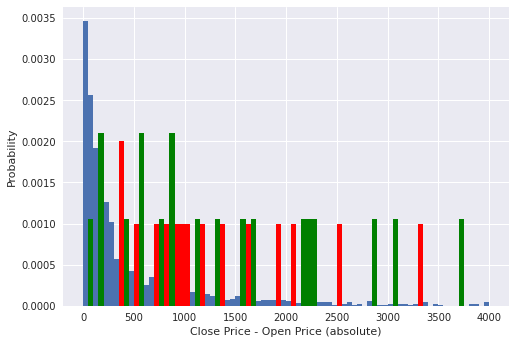

In [158]:
mpl.style.use("seaborn")
plt.hist(df["MOVE"], bins = 100, range = (0, 5000), density = True)
plt.hist(df["MOVE"].loc[df["date"].isin(cpi)], bins = 100, range = (0, 5000), density = True, color = "r")
plt.hist(df["MOVE"].loc[df["date"].isin(pce)], bins = 100, range = (0, 5000), density = True, color = "g")
plt.xlabel("Close Price - Open Price (absolute)")
plt.ylabel("Probability")

(array([0.000375, 0.00025 , 0.00075 , 0.000125, 0.00025 , 0.000375,
        0.000125, 0.      , 0.000125, 0.000125]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <BarContainer object of 10 artists>)

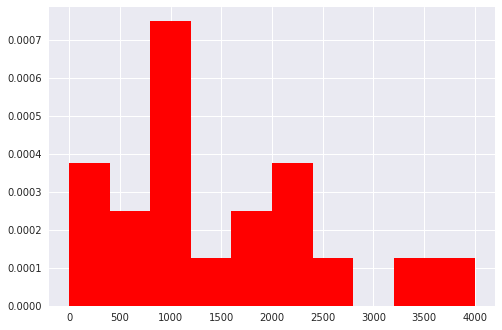

In [161]:
# cpi histogram

plt.hist(df["MOVE"].loc[df["date"].isin(cpi)], bins = 10, range = (0, 5000), density = True, color = "r")

(array([0.00039474, 0.00052632, 0.00039474, 0.00026316, 0.00013158,
        0.00039474, 0.        , 0.00026316, 0.        , 0.00013158]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <BarContainer object of 10 artists>)

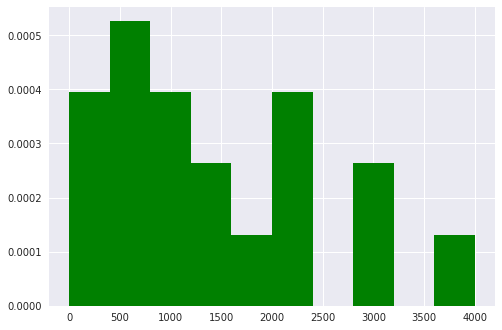

In [163]:
# pce histogram

plt.hist(df["MOVE"].loc[df["date"].isin(pce)], bins = 10, range = (0, 5000), density = True, color = "g")